# Building domain features from URI paths

In [1]:
import gzip
from pprint import pprint
import ccfunctions as cc

pathfile = "../sdata/domain_paths_from_1_WAT_file.gz"

with gzip.open(pathfile, "rb") as f:
    domains = [eval(line) for line in f.readlines()]
dstrings = [cc.domain_string(x['domain'], x['path_set']) for x in domains]

pprint(domains[0])

{'domain': u'vkaraoke.org',
 'path_set': set([(u'/artist/330', 1),
                  (u'/misc/arrow-desc.png', 0),
                  (u'/sites/default/files/logo_2017.png', 0),
                  (u'/sites/default/files/styles/artist_image_34x34_/public/photo/2016/02//_0rcinfl8rn4.jpg',
                   0),
                  (u'/sites/default/files/styles/artist_image_34x34_/public/photo/2017/01/ahmed_shad_ahmed_shad/artist_vkaraoke_ahmed_shad_ahmed_shad.png',
                   0),
                  (u'/sites/default/files/styles/artist_image_34x34_/public/photo/2017/01/artyom_pivovarov/artist_vkaraoke_artyom_pivovarov.jpg',
                   0),
                  (u'/sites/default/files/styles/artist_image_34x34_/public/photo/2017/01/elena_temnikova/artist_vkaraoke_elena_temnikova.jpg',
                   0),
                  (u'/sites/default/files/styles/artist_image_34x34_/public/photo/2017/01/elvira_t_elvira_t/artist_vkaraoke_elvira_t_elvira_t.jpg',
                   0),
    

In [2]:
import random

str = random.choice(dstrings)
print(str)

www.palico.com
/funds/fortissimo-capital-iv/c4b23581aca7443ab279af87ed234f37
/general-partners/emincap/dab1795f6cc447d786d4c2dc8ec2068d
/legal-notices/
/legal/TERMS_OF_SERVICE_AND_ACCOUNT.pdf
/overview-GP.html
/overview-LP.html
/overview-SP.html
/presentation.html
/privacy-policy.html





In [30]:
from statistics import median
from math import log
from collections import Counter
import re 
import numpy as np 

def is_crawled(dom):
    return max([p[1] for p in dom['path_set']])
  
def string_byte_dist(str):
    bytes = [int(b.encode('utf-8').encode('hex'), 16) for b in str]
    out = dict([(x,0) for x in range(256)])
    ct = dict(Counter(bytes))
    for k in out.keys():
         if k in ct.keys():
            out[k] += ct[k]
    out = [v[1] for v in sorted(out.iteritems(), key=lambda (k,v): k)]
    out = [float(x)/sum(out) for x in out]
    return out

def domain_byte_dist(dom):
    name = dom['domain']
    uris = [p[0] for p in dom['path_set']] + [name]
    str = '\n'.join(uris)
    return string_byte_dist(str)

def basic(dom):
    name = dom['domain']
    uris = [p[0] for p in dom['path_set']] + [name]
    N = len(uris)
    depths = np.array([cc.depth(u) for u in uris[:-1]])
    lengths = np.array([1. + cc.length(u) for u in uris])
    dots = np.array([len(re.findall(r'\.', str)) for str in uris])/lengths
    hyphens = np.array([len(re.findall(r'-', str)) for str in uris])/lengths
    underscores = np.array([len(re.findall(r'_', str)) for str in uris])/lengths
    caps = np.array([len(re.findall(r'[A-Z]', str)) for str in uris])/lengths
    nums = np.array([len(re.findall(r'[0-9]', str)) for str in uris])/lengths
    return [log(N), 
            min(caps), median(caps), max(caps),
            min(nums), median(nums), max(nums),
            min(dots), median(dots), max(dots),
            min(hyphens), median(hyphens), max(hyphens),
            min(underscores), median(underscores), max(underscores),
            min(depths), median(depths), max(depths),
            min(lengths), median(lengths), max(lengths)]

def basic_v2(dom):
    return basic(dom) + domain_byte_dist(dom)

crawled = [is_crawled(dom) for dom in domains]
features = np.array([basic_v2(dom) for dom in domains])
features.shape

(99807, 278)

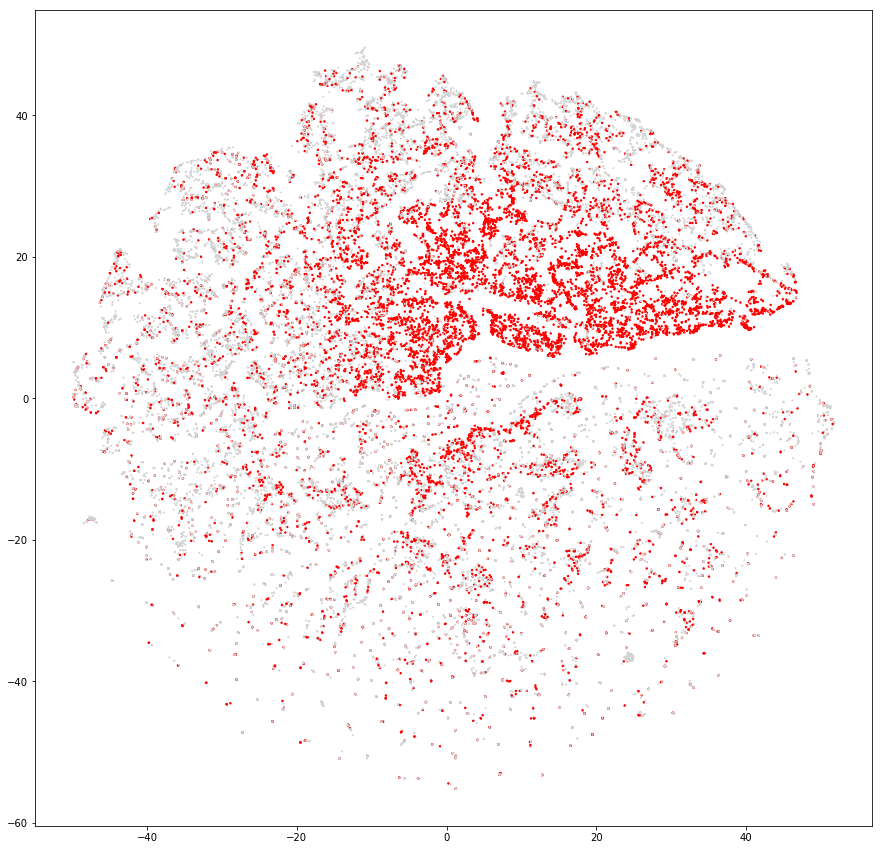

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from tsne import bh_sne

N = 40000

rg = random.sample(range(len(features)), N)
subset = features[rg]
proj_2d = bh_sne(subset, theta=0.5)

col = ['lightgrey', 'red']
col =[col[crawled[i]] for i in rg]
size = [1.0, 2.0]
size =[size[crawled[i]] for i in rg]

plt.figure(figsize=(15,15))
plt.scatter(proj_2d[:,0], proj_2d[:,1], s=size, c=col)
plt.show()

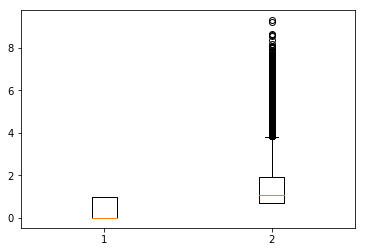

In [162]:
dat = np.array([crawled, features[:,0]]).transpose()

plt.boxplot(dat)
plt.show()